In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:/Imarticus lecture Files/Capstone Project Folder/KPMG Data_Spend Analytics 2.xlsx")
df

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,TrackingNo,Matl Group,...,CRM Item No,Down Payment Amount,Priority (Material Required Within),Ordered By,Approved By,Priority,Section,Indenter ID,Input Tax Credit,Item.2
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,NaN,NaN,1310,...,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,NaN,NaN,1310,...,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,NaN,NaN,ASSETS,...,0,0,0,54651,54680,NaN,0,54651,T3,0
3,1000007299,20,2018-09-29,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,...,0,0,0,0,0,NaN,0,0,T3,0
4,1000007299,30,2018-09-29,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,...,0,0,0,0,0,NaN,0,0,T3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151407,9500017212,10,2019-03-28,Hyd. Jack Repair Work Of Bakal Workshop,NaN,7860,1950,NaN,NaN,SERVICE,...,0,0,0,0,0,NaN,0,0,T4,0
151408,9500017213,10,2019-03-28,Turbo Repair Work From New MMG CG08L3078,NaN,7860,1950,NaN,NaN,SERVICE,...,0,0,0,0,0,NaN,0,0,T4,0
151409,9500017214,10,2019-03-28,Turbo Repair Work From New MMG CG08L1458,NaN,7860,1950,NaN,NaN,SERVICE,...,0,0,0,0,0,NaN,0,0,T4,0
151410,9500017215,10,2019-03-28,Hyd.Hose Repair Parmar Auto Indus. L2240,NaN,7860,1950,NaN,NaN,SERVICE,...,0,0,0,0,0,NaN,0,0,T4,0


In [3]:
#To display the na in all the columns of the data frame
pd.set_option('display.max_rows',65)

In [4]:
df.isna().sum()

Purch.Doc.                                  0
Item                                        0
Changed On                                  0
Short Text                                  0
Material                                 3091
CoCd                                        0
Plnt                                        0
SLoc                                    32176
TrackingNo                             142207
Matl Group                                  0
PO Quantity                                 0
OUn                                         0
OPU                                         0
Conv.                                       0
Eq. To                                      0
Net Price                                   0
Per                                         0
Net Value                                   0
Gross value                                 0
GRT                                         0
Overdel. Tol.                               0
Underdel.Tol.                     

In [5]:
df.drop(columns=["TrackingNo","A", "Cns","S","S.1","Spec. Stk Valuation","Requested By","Priority","Input Tax Credit"], inplace= True, axis =1)

In [6]:
df.shape


(151412, 56)

After removing the columns which had na values more than 50% we cut dowm the column numbers from 65 to 56

In [7]:
#This is to understand the #of unique categories with their percentages
df["SLoc"].value_counts(normalize=True)

CGEN    0.108256
9101    0.080295
9102    0.063731
9106    0.062045
F001    0.045867
          ...   
B798    0.000008
B926    0.000008
B390    0.000008
C138    0.000008
A334    0.000008
Name: SLoc, Length: 1526, dtype: float64

In [8]:
print(df.nunique())

Purch.Doc.                             84368
Item                                      58
Changed On                               321
Short Text                             12424
Material                               10405
CoCd                                       5
Plnt                                     136
SLoc                                    1526
Matl Group                               153
PO Quantity                            27116
OUn                                       33
OPU                                       33
Conv.                                      1
Eq. To                                     3
Net Price                              16545
Per                                      102
Net Value                              69135
Gross value                            67730
GRT                                        1
Overdel. Tol.                             17
Underdel.Tol.                              6
DCI                                        1
Item.1    

In [9]:
df.drop(columns=["Conv.","GRT","DCI","Agr. Cum. Qty","TOZ","Quantity",
                 "Cat","Net value","Object no.","Time of Transmission",
                 "Next Transmission Number","Itm","Itm.1","Requirement Urgency",
                 "CRM  Item No","Down Payment Amount","Item.2"], inplace= True, axis =1)

In [10]:
df

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,...,Volume,RShLi,MTyp,NCM Code,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Section,Indenter ID
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,NaN,1310,1.0,...,0.0,0,YGEN,84369900,0.0,7,54745,54680,Maintenance,54745
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,NaN,1310,1.0,...,0.0,1,YGEN,84369900,0.0,7,54745,54680,Maintenance,54745
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,NaN,ASSETS,11.0,...,0.0,1,YCGM,8704,9058192.0,0,54651,54680,0,54651
3,1000007299,20,2018-09-29,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,ASSETS,11.0,...,0.0,0,NaN,NaN,115940.0,0,0,0,0,0
4,1000007299,30,2018-09-29,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,ASSETS,11.0,...,0.0,0,NaN,NaN,110000.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151407,9500017212,10,2019-03-28,Hyd. Jack Repair Work Of Bakal Workshop,NaN,7860,1950,NaN,SERVICE,1.0,...,0.0,0,NaN,NaN,1500.0,0,0,0,0,0
151408,9500017213,10,2019-03-28,Turbo Repair Work From New MMG CG08L3078,NaN,7860,1950,NaN,SERVICE,1.0,...,0.0,0,NaN,998729,4050.0,0,0,0,0,0
151409,9500017214,10,2019-03-28,Turbo Repair Work From New MMG CG08L1458,NaN,7860,1950,NaN,SERVICE,1.0,...,0.0,0,NaN,998729,2100.0,0,0,0,0,0
151410,9500017215,10,2019-03-28,Hyd.Hose Repair Parmar Auto Indus. L2240,NaN,7860,1950,NaN,SERVICE,1.0,...,0.0,0,NaN,998729,450.0,0,0,0,0,0


In [11]:
df.shape

(151412, 39)

For SLoc column we will replace all the NA values as "Unknown" so that we don't delete the column


In [12]:
#df["SLoc"]
df['SLoc'] = df['SLoc'].replace(np.nan,"Unknown")

In [13]:
df

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,...,Volume,RShLi,MTyp,NCM Code,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Section,Indenter ID
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,Unknown,1310,1.0,...,0.0,0,YGEN,84369900,0.0,7,54745,54680,Maintenance,54745
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,Unknown,1310,1.0,...,0.0,1,YGEN,84369900,0.0,7,54745,54680,Maintenance,54745
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,Unknown,ASSETS,11.0,...,0.0,1,YCGM,8704,9058192.0,0,54651,54680,0,54651
3,1000007299,20,2018-09-29,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,Unknown,ASSETS,11.0,...,0.0,0,NaN,NaN,115940.0,0,0,0,0,0
4,1000007299,30,2018-09-29,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,Unknown,ASSETS,11.0,...,0.0,0,NaN,NaN,110000.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151407,9500017212,10,2019-03-28,Hyd. Jack Repair Work Of Bakal Workshop,NaN,7860,1950,Unknown,SERVICE,1.0,...,0.0,0,NaN,NaN,1500.0,0,0,0,0,0
151408,9500017213,10,2019-03-28,Turbo Repair Work From New MMG CG08L3078,NaN,7860,1950,Unknown,SERVICE,1.0,...,0.0,0,NaN,998729,4050.0,0,0,0,0,0
151409,9500017214,10,2019-03-28,Turbo Repair Work From New MMG CG08L1458,NaN,7860,1950,Unknown,SERVICE,1.0,...,0.0,0,NaN,998729,2100.0,0,0,0,0,0
151410,9500017215,10,2019-03-28,Hyd.Hose Repair Parmar Auto Indus. L2240,NaN,7860,1950,Unknown,SERVICE,1.0,...,0.0,0,NaN,998729,450.0,0,0,0,0,0


In [14]:
print(df.nunique())

Purch.Doc.                             84368
Item                                      58
Changed On                               321
Short Text                             12424
Material                               10405
CoCd                                       5
Plnt                                     136
SLoc                                    1527
Matl Group                               153
PO Quantity                            27116
OUn                                       33
OPU                                       33
Eq. To                                     3
Net Price                              16545
Per                                      102
Net Value                              69135
Gross value                            67730
Overdel. Tol.                             17
Underdel.Tol.                              6
Item.1                                    20
BUn                                       28
Non-deductible                          6157
Price Date

In [15]:
df.describe()

,Purch.Doc.,Item,Material,CoCd,PO Quantity,Eq. To,Net Price,Per,Net Value,Gross value,...,PTm,Net Weight,Gross Weight,Volume,RShLi,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Indenter ID
count,1.514120e+05,151412.000000,1.483210e+05,151412.000000,1.514120e+05,151412.000000,1.514120e+05,151412.000000,1.514120e+05,1.514120e+05,...,151412.000000,151412.000000,151412.000000,151412.000000,151412.000000,1.514120e+05,151412.000000,151412.000000,151412.000000,151412.000000
mean,8.355363e+09,18.774978,3.255518e+06,8470.368663,1.390414e+04,0.987835,9.608130e+03,62.083877,3.030524e+05,3.034043e+05,...,0.140015,0.295321,0.296956,0.000758,16.876872,2.133251e+05,1.835086,10113.892261,10549.475260,10840.154783
std,1.405010e+09,23.387443,3.029179e+06,731.239748,8.560236e+04,3.212998,1.752717e+05,886.998007,1.897927e+06,1.897819e+06,...,3.739254,0.474988,0.476862,0.092396,82.645507,1.775853e+06,6.645434,21253.924021,21580.031654,21823.024473
min,1.000004e+09,1.000000,8.000020e+05,4500.000000,1.000000e-03,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.600176e+09,10.000000,9.104200e+05,7860.000000,2.160000e+01,1.000000,1.452000e+01,1.000000,6.311000e+02,6.600000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,9.100296e+09,10.000000,9.500280e+05,9000.000000,4.150000e+02,1.000000,2.798000e+01,1.000000,4.476862e+04,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.498200e+02,0.000000,0.000000,0.000000,0.000000
75%,9.200094e+09,20.000000,7.101328e+06,9000.000000,7.381214e+03,1.000000,2.747900e+02,1.000000,2.289344e+05,2.299094e+05,...,0.000000,0.700000,0.700000,0.000000,0.000000,8.910000e+04,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,550.000000,8.800080e+06,9000.000000,5.000000e+06,1250.000000,2.711864e+07,79400.000000,2.120000e+08,2.120000e+08,...,100.000000,18.100000,18.500000,20.000000,1005.000000,5.716000e+07,99.000000,54917.000000,54917.000000,54915.000000


In [16]:
#To find the summary for entire dataframe.
# include = object gives summary for categorical data s 
df.describe(include='object')


,Short Text,Plnt,SLoc,Matl Group,OUn,OPU,BUn,Un,Profit Ctr,MTyp,NCM Code,Section
count,151412,151412,151412,151412,151412,151412,148321,67436,148321,148321,147913,151412
unique,12424,136,1527,153,33,33,28,2,131,15,906,1010
top,Gunny-Bags Damage-2 Katta-0.7Kg,9120,Unknown,1500,KG,KG,KG,KG,0000009120,ZROH,2309,0
freq,15216,28750,32176,41217,69667,69669,69481,55195,28750,47029,41659,123223


In [40]:
df.isna().sum()

Purch.Doc.       0
Changed On       0
Short Text       0
Material         0
CoCd             0
Plnt             0
Matl Group       0
PO Quantity      0
OPU              0
Net Price        0
Net Value        0
Gross value      0
Overdel. Tol.    0
Underdel.Tol.    0
Item.1           0
Price Date       0
MTyp             0
Reb.basis        0
Section          0
dtype: int64

In [18]:
df.drop(columns = "Un", inplace = True, axis = 1)

In [19]:
df.isna().sum()

Purch.Doc.                                0
Item                                      0
Changed On                                0
Short Text                                0
Material                               3091
CoCd                                      0
Plnt                                      0
SLoc                                      0
Matl Group                                0
PO Quantity                               0
OUn                                       0
OPU                                       0
Eq. To                                    0
Net Price                                 0
Per                                       0
Net Value                                 0
Gross value                               0
Overdel. Tol.                             0
Underdel.Tol.                             0
Item.1                                    0
BUn                                    3091
Non-deductible                            0
Price Date                      

In [20]:
df.dropna(subset=["MTyp"],inplace= True, axis=0)

In [21]:
df.isna().sum()

Purch.Doc.                                0
Item                                      0
Changed On                                0
Short Text                                0
Material                                  0
CoCd                                      0
Plnt                                      0
SLoc                                      0
Matl Group                                0
PO Quantity                               0
OUn                                       0
OPU                                       0
Eq. To                                    0
Net Price                                 0
Per                                       0
Net Value                                 0
Gross value                               0
Overdel. Tol.                             0
Underdel.Tol.                             0
Item.1                                    0
BUn                                       0
Non-deductible                            0
Price Date                      

In [22]:
df.dropna(subset=["Price Date"],inplace= True, axis=0)

In [23]:
df.isna().sum()

Purch.Doc.                                0
Item                                      0
Changed On                                0
Short Text                                0
Material                                  0
CoCd                                      0
Plnt                                      0
SLoc                                      0
Matl Group                                0
PO Quantity                               0
OUn                                       0
OPU                                       0
Eq. To                                    0
Net Price                                 0
Per                                       0
Net Value                                 0
Gross value                               0
Overdel. Tol.                             0
Underdel.Tol.                             0
Item.1                                    0
BUn                                       0
Non-deductible                            0
Price Date                      

In [24]:
#from sklearn.preprocessing import Imputer    strategy ='most_frequent',axis=0)
#from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import KNNImputer
#imp = KNNImputer(missing_values='NaN')
#imp.fit(df['NCM Code'])
#print(imp.transform(df['NCM Code']))

#imputer = KNNImputer(n_neighbors=2)
#After_imputation = imputer.fit_transform(Before_imputation)

In [25]:
# Imputing the mode value to fill the NA values
#df.fillna(df['NCM Code'].mode()[0], inplace = True)

In [26]:
df.shape

(147839, 38)

In [27]:
df.isna().sum()

Purch.Doc.                                0
Item                                      0
Changed On                                0
Short Text                                0
Material                                  0
CoCd                                      0
Plnt                                      0
SLoc                                      0
Matl Group                                0
PO Quantity                               0
OUn                                       0
OPU                                       0
Eq. To                                    0
Net Price                                 0
Per                                       0
Net Value                                 0
Gross value                               0
Overdel. Tol.                             0
Underdel.Tol.                             0
Item.1                                    0
BUn                                       0
Non-deductible                            0
Price Date                      

In [28]:
df

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,...,Volume,RShLi,MTyp,NCM Code,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Section,Indenter ID
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,Unknown,1310,1.000,...,0.0,0,YGEN,84369900,0.00,7,54745,54680,Maintenance,54745
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,Unknown,1310,1.000,...,0.0,1,YGEN,84369900,0.00,7,54745,54680,Maintenance,54745
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,Unknown,ASSETS,11.000,...,0.0,1,YCGM,8704,9058192.00,0,54651,54680,0,54651
5,1000007299,40,2018-09-29,"Tata LPT 1412 CRX, BS-IV, 48, SHDLB, 12.",816631.0,9000,9110,Unknown,ASSETS,10.000,...,0.0,0,YCGM,8704,11679690.00,0,0,0,0,0
8,1000007320,10,2018-12-07,Material for Prefabricated buildings,814723.0,9000,9406,Unknown,1342,1.000,...,0.0,0,YCGM,9406,2096100.97,0,54745,54680,0,54745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151274,9400141363,10,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,BRWS,2211,500.000,...,0.0,0,YROH,0407,0.00,0,0,0,0,0
151275,9400141364,10,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,BRWS,2211,760.000,...,0.0,0,YROH,0407,0.00,0,0,0,0,0
151276,9400141365,10,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,BRWS,2211,1510.000,...,0.0,0,YROH,0407,0.00,0,0,0,0,0
151277,9400141366,10,2019-03-31,Beat Husk (New),940736.0,9000,9130,9111,2006,4.715,...,0.0,0,YCON,3101,0.00,0,0,0,0,0


In [29]:
correlations = df.corr()
correlations
#df.describe()

,Purch.Doc.,Item,Material,CoCd,PO Quantity,Eq. To,Net Price,Per,Net Value,Gross value,...,PTm,Net Weight,Gross Weight,Volume,RShLi,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Indenter ID
Purch.Doc.,1.000000,-0.334910,-0.446140,0.586347,-0.056438,-0.001671,-0.026183,-0.039349,-0.037653,-0.037679,...,-0.038389,0.278567,0.275823,-0.008415,-0.117416,-0.072347,-0.318731,-0.355689,-0.359843,-0.347807
Item,-0.334910,1.000000,0.022198,-0.122703,0.038174,-0.000973,-0.023457,0.025260,0.033494,0.033611,...,-0.007423,-0.058987,-0.058110,0.000706,0.018519,0.054947,0.277168,0.226136,0.215614,0.211085
Material,-0.446140,0.022198,1.000000,-0.724775,0.150744,-0.002099,-0.041104,0.068658,0.093626,0.093504,...,0.048308,-0.395650,-0.389784,0.010868,0.226445,0.139661,-0.062276,-0.022682,0.002925,-0.007175
CoCd,0.586347,-0.122703,-0.724775,1.000000,-0.101780,-0.002255,0.040889,-0.035423,-0.060274,-0.060201,...,-0.078258,0.337993,0.333747,-0.017154,-0.200363,-0.101380,-0.247681,-0.226319,-0.238672,-0.227797
PO Quantity,-0.056438,0.038174,0.150744,-0.101780,1.000000,-0.000427,-0.012649,0.096067,0.778818,0.778759,...,-0.003715,-0.060718,-0.056356,-0.000879,0.120023,0.815299,-0.011156,0.053614,0.049542,0.047555
Eq. To,-0.001671,-0.000973,-0.002099,-0.002255,-0.000427,1.000000,-0.000300,-0.000181,-0.000417,-0.000418,...,-0.000099,-0.001631,-0.001634,-0.000022,-0.000538,-0.000313,0.001311,0.005512,0.005392,0.005314
Net Price,-0.026183,-0.023457,-0.041104,0.040889,-0.012649,-0.000300,1.000000,0.570456,0.035950,0.036038,...,-0.004439,0.061956,0.061321,-0.000853,0.017245,0.015397,0.034104,0.048196,0.044990,0.046606
Per,-0.039349,0.025260,0.068658,-0.035423,0.096067,-0.000181,0.570456,1.000000,0.009901,0.009888,...,-0.002641,-0.004108,0.003276,-0.000579,0.123173,0.009702,0.032007,0.141660,0.126419,0.140886
Net Value,-0.037653,0.033494,0.093626,-0.060274,0.778818,-0.000417,0.035950,0.009901,1.000000,0.999993,...,-0.005917,-0.018063,-0.018512,-0.000931,-0.006891,0.929464,-0.021981,-0.048680,-0.049543,-0.050674
Gross value,-0.037679,0.033611,0.093504,-0.060201,0.778759,-0.000418,0.036038,0.009888,0.999993,1.000000,...,-0.005924,-0.018133,-0.018582,-0.000932,-0.006924,0.929509,-0.021700,-0.048526,-0.049395,-0.050530


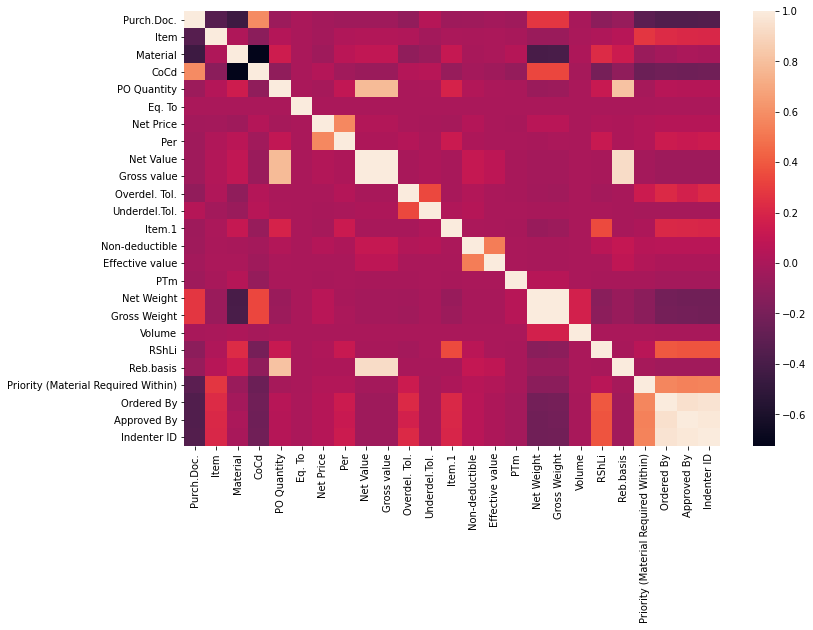

In [30]:
#Plotting the 
plt.figure(figsize=(12,8))
sns.heatmap(correlations)
plt.show()

In [31]:
# Here we are dropping columns based on few basic understanding.
df.drop(columns = ["SLoc","OUn","Eq. To","Per","BUn","Non-deductible","Effective value","PTm","Net Weight","Profit Ctr",
                   "Gross Weight","Volume","RShLi","NCM Code","Priority (Material Required Within)","Ordered By",
                   "Approved By","Indenter ID","Item"], inplace = True, axis = 1)

In [32]:
df.shape

(147839, 19)

In [33]:
#Saving the file as an excel file and from now onwards this will be used for doing any analysis.
df1 = df.to_excel("Final_data.xlsx", sheet_name = "Data")

In [34]:
df

,Purch.Doc.,Changed On,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,OPU,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Item.1,Price Date,MTyp,Reb.basis,Section
0,1000007270,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,1.000,EA,4400.00,4400.00,4400.00,0,0,0,2018-03-24,YGEN,0.00,Maintenance
1,1000007270,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,1310,1.000,EA,6100.00,6100.00,6100.00,0,0,0,2018-03-24,YGEN,0.00,Maintenance
2,1000007299,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,ASSETS,11.000,EA,823472.00,9058192.00,9058192.00,0,0,0,2018-05-07,YCGM,9058192.00,0
5,1000007299,2018-09-29,"Tata LPT 1412 CRX, BS-IV, 48, SHDLB, 12.",816631.0,9000,9110,ASSETS,10.000,EA,1167969.00,11679690.00,11679690.00,0,0,0,2018-05-07,YCGM,11679690.00,0
8,1000007320,2018-12-07,Material for Prefabricated buildings,814723.0,9000,9406,1342,1.000,LE,2096100.97,2096100.97,2096100.97,0,0,0,2018-05-18,YCGM,2096100.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151274,9400141363,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,2211,500.000,KG,15.00,7500.00,7500.00,0,0,0,2019-03-30,YROH,0.00,0
151275,9400141364,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,2211,760.000,KG,15.00,11400.00,11400.00,0,0,0,2019-03-31,YROH,0.00,0
151276,9400141365,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,2211,1510.000,KG,15.00,22650.00,22650.00,0,0,0,2019-03-31,YROH,0.00,0
151277,9400141366,2019-03-31,Beat Husk (New),940736.0,9000,9130,2006,4.715,TO,1800.00,8487.00,8487.00,0,0,0,2019-03-31,YCON,0.00,0


In [35]:
df.isna().sum()

Purch.Doc.       0
Changed On       0
Short Text       0
Material         0
CoCd             0
Plnt             0
Matl Group       0
PO Quantity      0
OPU              0
Net Price        0
Net Value        0
Gross value      0
Overdel. Tol.    0
Underdel.Tol.    0
Item.1           0
Price Date       0
MTyp             0
Reb.basis        0
Section          0
dtype: int64

In [42]:
df

,Purch.Doc.,Changed On,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,OPU,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Item.1,Price Date,MTyp,Reb.basis,Section
0,1000007270,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,1.000,EA,4400.00,4400.00,4400.00,0,0,0,2018-03-24,YGEN,0.00,Maintenance
1,1000007270,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,1310,1.000,EA,6100.00,6100.00,6100.00,0,0,0,2018-03-24,YGEN,0.00,Maintenance
2,1000007299,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,ASSETS,11.000,EA,823472.00,9058192.00,9058192.00,0,0,0,2018-05-07,YCGM,9058192.00,0
5,1000007299,2018-09-29,"Tata LPT 1412 CRX, BS-IV, 48, SHDLB, 12.",816631.0,9000,9110,ASSETS,10.000,EA,1167969.00,11679690.00,11679690.00,0,0,0,2018-05-07,YCGM,11679690.00,0
8,1000007320,2018-12-07,Material for Prefabricated buildings,814723.0,9000,9406,1342,1.000,LE,2096100.97,2096100.97,2096100.97,0,0,0,2018-05-18,YCGM,2096100.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151274,9400141363,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,2211,500.000,KG,15.00,7500.00,7500.00,0,0,0,2019-03-30,YROH,0.00,0
151275,9400141364,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,2211,760.000,KG,15.00,11400.00,11400.00,0,0,0,2019-03-31,YROH,0.00,0
151276,9400141365,2019-03-31,Egg Shell (Chilka & CN),910410.0,9000,9404,2211,1510.000,KG,15.00,22650.00,22650.00,0,0,0,2019-03-31,YROH,0.00,0
151277,9400141366,2019-03-31,Beat Husk (New),940736.0,9000,9130,2006,4.715,TO,1800.00,8487.00,8487.00,0,0,0,2019-03-31,YCON,0.00,0


In [94]:
df_Cluster = df.groupby("Purch.Doc.", as_index=False).agg({"Short Text":"count",
                              "Net Value":"sum"})

In [95]:
#Total Net Value and Order Frequency

In [96]:
df_Cluster.rename(columns={"Short Text":"Items","Net Value":"Price"},inplace=True)
df_Cluster

,Purch.Doc.,Items,Price
0,1000004129,1,539216.0
1,1000004531,18,16816.9
2,1000007248,52,1237000.0
3,1000007270,2,10500.0
4,1000007299,2,20737882.0
...,...,...,...
82812,9500016179,1,13295.0
82813,9500016675,1,37516.5
82814,9500016992,1,49946.0
82815,9900000069,1,7560.0


In [100]:
df_Cluster_2 = df_Cluster[["Items","Price"]]

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Scaled = scaler.fit_transform(df_Cluster_2)
df_Scaled

array([[-6.18258233e-01, -2.07765826e-03],
       [ 1.27685795e+01, -1.08933181e-01],
       [ 3.95422551e+01,  1.40652438e-01],
       ...,
       [-6.18258233e-01, -1.02156700e-01],
       [-6.18258233e-01, -1.10826658e-01],
       [-6.18258233e-01, -1.10826658e-01]])

In [63]:
df_Scaled = pd.DataFrame(df_Scaled)

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit_transform(df_Scaled)
print(kmeans.inertia_)

39379.535567780964


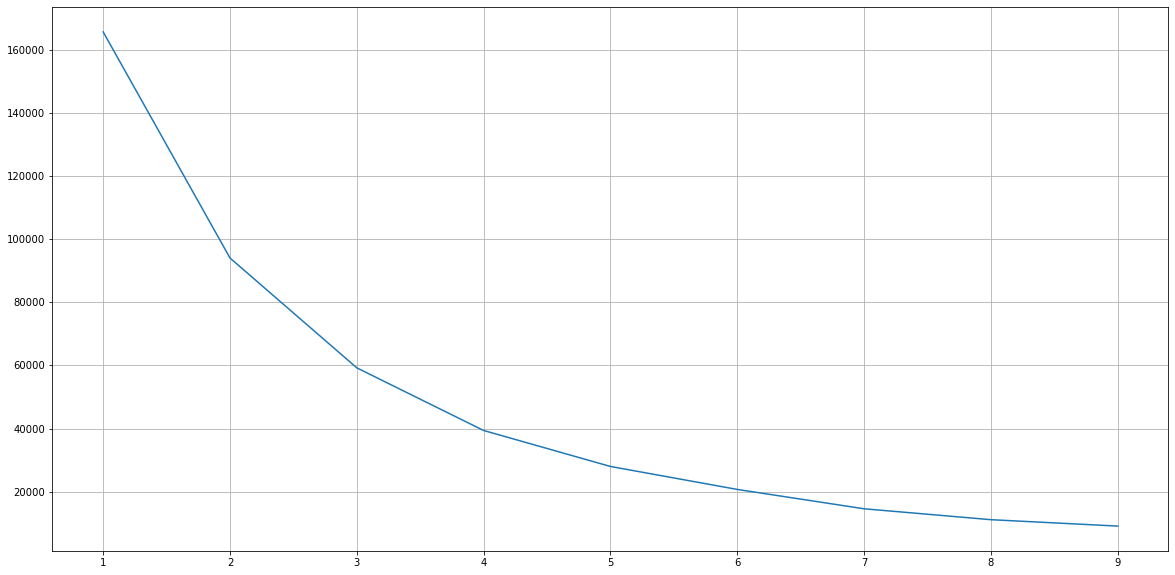

In [66]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_Scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(range(1,10),inertia)
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_Scaled)
print(kmeans.inertia_)

39379.535567780964


In [87]:
#df_Scaled["Labels"] = kmeans.labels_
df_Scaled.drop(columns = "Labels",inplace=True)

In [91]:
df_Cluster["Labels"] = kmeans.labels_
df_Cluster["Labels"].value_counts()

3    46498
0    35656
1      451
2      212
Name: Labels, dtype: int64

In [93]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_Scaled, kmeans.labels_, metric="euclidean")
print(score)

0.7672112135042192


In [92]:
df_Cluster

,Purch.Doc.,Items,Price,Labels
0,1000004129,1,539216.0,0
1,1000004531,18,16816.9,1
2,1000007248,52,1237000.0,1
3,1000007270,2,10500.0,3
4,1000007299,2,20737882.0,3
...,...,...,...,...
82812,9500016179,1,13295.0,0
82813,9500016675,1,37516.5,0
82814,9500016992,1,49946.0,0
82815,9900000069,1,7560.0,0


C:\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


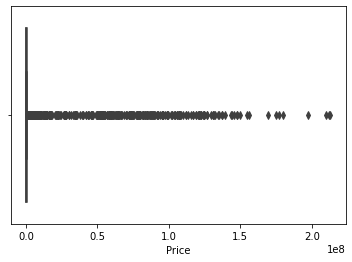

In [159]:
sns.boxplot(df_Cluster["Price"])
plt.show()

C:\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


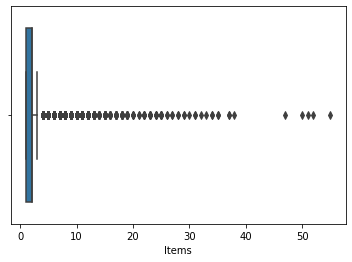

In [158]:
sns.boxplot(df_Cluster["Items"])
plt.show()

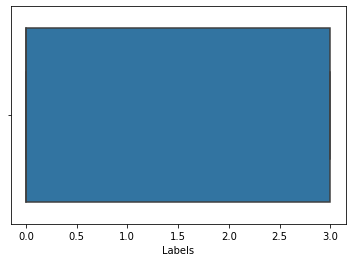

In [156]:
sns.boxplot(df_Cluster["Labels"])
plt.show()

In [101]:
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Scaled = scaler.fit_transform(df_Cluster_2)
df_Scaled

array([[0.00000000e+00, 2.53214138e-03],
       [3.14814815e-01, 7.89715880e-05],
       [9.44444444e-01, 5.80891315e-03],
       ...,
       [0.00000000e+00, 2.34544802e-04],
       [0.00000000e+00, 3.55014759e-05],
       [0.00000000e+00, 3.55014759e-05]])

In [102]:
df_Scaled = pd.DataFrame(df_Scaled)
df_Scaled

,0,1
0,0.000000,0.002532
1,0.314815,0.000079
2,0.944444,0.005809
3,0.018519,0.000049
4,0.018519,0.097384
...,...,...
82812,0.000000,0.000062
82813,0.000000,0.000176
82814,0.000000,0.000235
82815,0.000000,0.000036


In [103]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_Scaled)
print(kmeans.inertia_)

21.476857956912454


In [106]:
df_Scaled["Labels"] = kmeans.labels_
df_Scaled["Labels"].value_counts()

0    46607
3    35656
2      343
1      211
Name: Labels, dtype: int64

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(df_Scaled.drop(columns="Labels"))
principalComponent

array([[-0.01098363,  0.00952664],
       [ 0.22454666, -0.19937494],
       [ 0.7026027 , -0.60916601],
       ...,
       [-0.01249476,  0.00779591],
       [-0.01262567,  0.00764597],
       [-0.01262567,  0.00764597]])

In [109]:
df_pca = pd.DataFrame(data=principalComponent,
                      columns=["PCA1","PCA2"])
target = pd.Series(df_Scaled["Labels"],name='target')
result_df = pd.concat([df_pca,target],axis=1)
result_df

,PCA1,PCA2,target
0,-0.010984,0.009527,3
1,0.224547,-0.199375,2
2,0.702603,-0.609166,2
3,0.001333,-0.004523,0
4,0.065350,0.068797,0
...,...,...,...
82812,-0.012608,0.007666,3
82813,-0.012533,0.007752,3
82814,-0.012495,0.007796,3
82815,-0.012626,0.007646,3


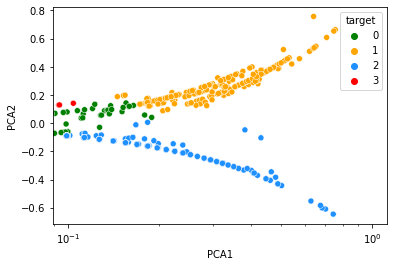

In [132]:
c = sns.scatterplot( x="PCA1", y="PCA2", hue="target", 
                    data=result_df, palette=['Green','orange','dodgerblue','red'], legend='full');
c.set(xscale="log");

In [165]:
label = kmeans.fit_predict(result_df)
u_labels = np.unique(label)

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

In [170]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [172]:
label

array([1, 2, 2, ..., 1, 1, 1])

In [173]:
for i in u_labels:
    plt.scatter(df[label == i , 1] , df[label == i , 2] , label = i)
plt.legend()
plt.show()

TypeError: '(array([False, False, False, ..., False, False, False]), 1)' is an invalid key

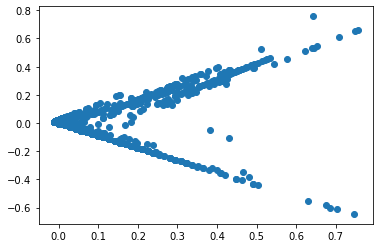

In [122]:
plt.scatter(result_df["PCA1"],result_df["PCA2"])

In [117]:
df_Cluster["Labels"] = kmeans.labels_
df_Cluster

,Purch.Doc.,Items,Price,Labels
0,1000004129,1,539216.0,3
1,1000004531,18,16816.9,2
2,1000007248,52,1237000.0,2
3,1000007270,2,10500.0,0
4,1000007299,2,20737882.0,0
...,...,...,...,...
82812,9500016179,1,13295.0,3
82813,9500016675,1,37516.5,3
82814,9500016992,1,49946.0,3
82815,9900000069,1,7560.0,3


In [118]:
df_Cluster[df_Cluster["Labels"]==0].describe()

,Purch.Doc.,Items,Price,Labels
count,4.660700e+04,46607.000000,4.660700e+04,46607.0
mean,8.602710e+09,2.274851,4.293997e+05,0.0
std,1.031669e+09,0.693536,9.715382e+05,0.0
min,1.000007e+09,2.000000,3.000000e+01,0.0
25%,7.600180e+09,2.000000,1.496562e+05,0.0
50%,9.100301e+09,2.000000,3.225685e+05,0.0
75%,9.400128e+09,2.000000,5.681600e+05,0.0
max,9.500016e+09,8.000000,4.535799e+07,0.0


In [119]:
df_Cluster[df_Cluster["Labels"]==1].describe()

,Purch.Doc.,Items,Price,Labels
count,2.110000e+02,211.000000,2.110000e+02,211.0
mean,7.609177e+09,5.696682,8.911795e+07,1.0
std,3.888583e+08,1.751989,3.442784e+07,0.0
min,3.000000e+09,1.000000,4.343104e+07,1.0
25%,7.600168e+09,4.000000,6.123024e+07,1.0
50%,7.600175e+09,5.000000,8.168632e+07,1.0
75%,7.600178e+09,7.000000,1.075509e+08,1.0
max,9.400139e+09,9.000000,2.129486e+08,1.0


In [120]:
df_Cluster[df_Cluster["Labels"]==2].describe()

,Purch.Doc.,Items,Price,Labels
count,3.430000e+02,343.000000,3.430000e+02,343.0
mean,6.306187e+09,14.451895,8.293392e+05,2.0
std,3.089189e+09,7.468248,4.142547e+06,0.0
min,1.000005e+09,9.000000,4.715300e+02,2.0
25%,3.000000e+09,10.000000,8.658545e+03,2.0
50%,7.500084e+09,12.000000,2.494800e+04,2.0
75%,9.200092e+09,16.000000,1.066775e+05,2.0
max,9.200099e+09,55.000000,4.644415e+07,2.0


In [121]:
df_Cluster[df_Cluster["Labels"]==3].describe()

,Purch.Doc.,Items,Price,Labels
count,3.565600e+04,35656.0,3.565600e+04,35656.0
mean,8.374541e+09,1.0,1.793827e+05,3.0
std,1.132644e+09,0.0,7.465581e+05,0.0
min,1.000004e+09,1.0,1.000000e-02,3.0
25%,7.600175e+09,1.0,4.633250e+03,3.0
50%,9.100294e+09,1.0,2.416100e+04,3.0
75%,9.100313e+09,1.0,1.506485e+05,3.0
max,9.900000e+09,1.0,3.786335e+07,3.0


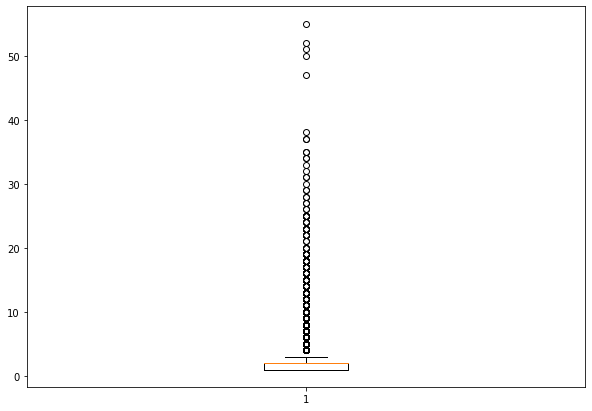

In [154]:
plt.figure(figsize =(10, 7))
plt.boxplot(df_Cluster.Items)
plt.show()
#sns.boxplot(df_Cluster["Labels"])

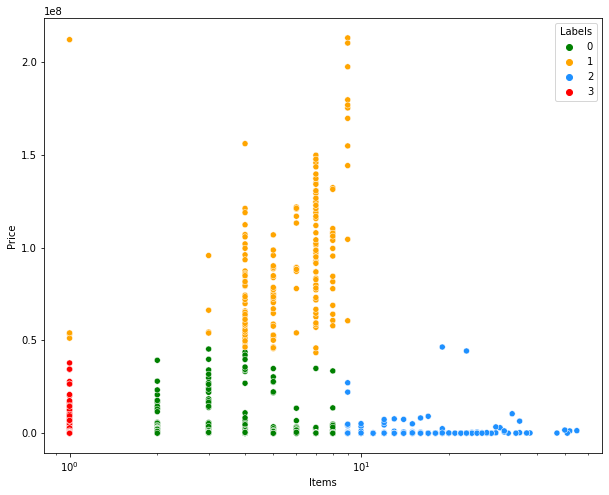

In [150]:
plt.figure(figsize=(10,8))
c = sns.scatterplot( x="Items", y="Price", hue="Labels", 
                    data=df_Cluster, palette=['Green','orange','dodgerblue','red'], legend='full');
c.set(xscale="log");

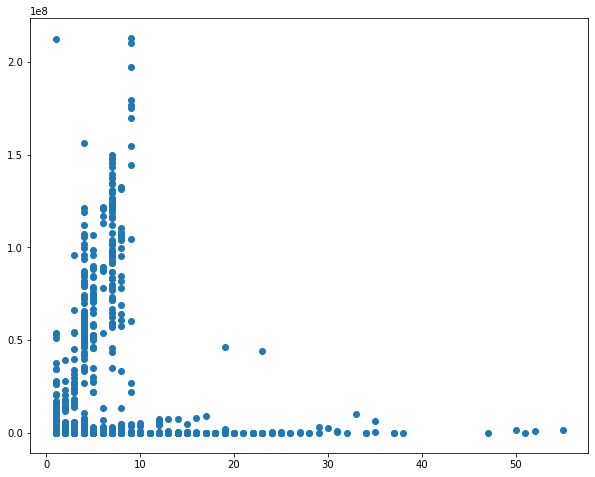

In [177]:
plt.figure(figsize=(10,8))
plt.scatter(df_Cluster["Items"],df_Cluster["Price"]);
